# Task
Реалізувати у вигляді програмного коду алгоритм PrefixSum для послідовної та паралельної реалізації алгоритму.
<br>Кількість елементів є ступенем двійки.
<br>Порівняти залежність часу виконання (або кількості операцій, на вибір) від розміру вхідних даних.
<br>Розмір вхідної послідовності не повинен перевищувати 1 000 000 значень
- - - 

In [1]:
import time
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def seq_prefixsum(array):
    out = []
    out.append(0)
    for i in range(1, len(array)):
        out.append(array[i-1] + out[i-1])

In [3]:
def parall_prefixsum(array, num_cores):

    def down_summator(array, level, num, proc):
        left = proc * num
        right = proc * (num + 1)
        for i in range(left + np.power(2, level + 1) - 1, right, np.power(2, level + 1)):
            value = array[i]
            array[i] = array[i] + array[i - np.power(2, level)]
            array[i - np.power(2, level)] = value

    def up_summator(array, level, num, proc): 
        left = proc * num
        right = proc * (num + 1)
        for i in range(left + np.power(2, level + 1) - 1, right, np.power(2, level + 1)):
            array[i] = array[i] + array[i - np.power(2, level)]

    def get_field_and_core(leng, level, num_cores):
        process_field = np.power(2, level + 1)
        core_num = int(leng / process_field)
        if core_num > num_cores:
            core_num = num_cores
            process_field = int(leng / core_num)
        return process_field, core_num

    def multiprocess(target, process_field, core_num, level):    
        for i in range(core_num):
            p = multiprocessing.Process(target=target, args=(array, level, i, process_field))
            p.daemon = False
            jobs.append(p)
            p.start()
        for p in jobs:
            p.join()
        return array
    
    leng = len(array)
    array += [0]
    array = multiprocessing.Array('i', array.copy())
    depth = np.log2(leng)
    
    for level in range(int(depth)):       
        process_field, core_num = get_field_and_core(leng, level, num_cores)
        array = multiprocess(up_summator, process_field, core_num, level)         
    total = array[leng - 1]
    array[leng - 1] = 0
    
    for level in range(int(depth) - 1, -1, -1):
        process_field, core_num = get_field_and_core(leng, level, num_cores)
        array = multiprocess(down_summator, process_field, core_num, level) 
    array[leng] = total   

In [4]:
num_cores = 4
jobs = []

seq_time = []
parall_time = []

for i in range(15):
    input_ = [1] * (np.power(2, i))
    
    start = time.time()
    seq_prefixsum(input_)
    seq_time.append(time.time() - start)

    start = time.time()
    parall_prefixsum(input_, num_cores)
    parall_time.append(time.time() - start)

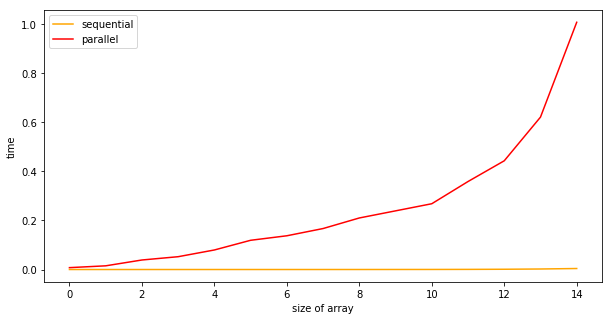

In [11]:
plt.figure(figsize=(10, 5))
plt.xlabel("size of array")
plt.ylabel("time")
plt.plot(np.arange(len(seq_time)), seq_time, label='sequential', color='orange')
plt.plot(np.arange(len(parall_time)), parall_time, label='parallel', color='red')
plt.ylim((min(seq_time) - 0.05, max(parall_time) + 0.05))
plt.legend()
plt.show()